<a href="https://colab.research.google.com/github/04khofifah/DA_RevoU/blob/main/NewDA_Grub25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For general purposes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/REVOU_DA/hotel_bookings.csv')


In [ ]:
# Set display to max columns
# Mengatur tampilan untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print(df.shape)

(119390, 32)


In [ ]:
# Menampilkan statistik deskriptif dari DataFrame 'hotel'
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Getting all of the data type info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dataset memiliki 32 variabel (Kontinu dan Kategorikal) dengan satu variabel terikat yang teridentifikasi (kategorikal), yaitu 'is_cancelled.

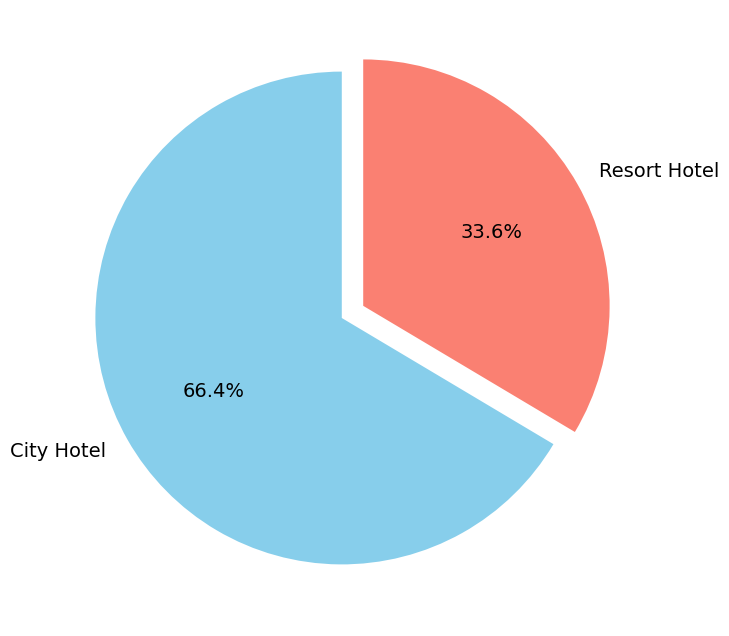

In [ ]:
# Mengatur ukuran grafik pie menjadi 8x8
plt.rcParams['figure.figsize'] = 8, 8

# Mengambil label dari kolom 'hotel' dan mengubahnya menjadi list
labels = df['hotel'].value_counts().index.tolist()

# Mengambil frekuensi kemunculan setiap label dan mengubahnya menjadi list
sizes = df['hotel'].value_counts().tolist()

# 'explode' menentukan seberapa jauh potongan-potongan pie dari pusat
explode = (0, 0.1)

# Menentukan warna untuk potongan-potongan pie
colors = ['skyblue', 'salmon']

# Membuat grafik pie dengan ukuran, label, warna, dan persentase yang telah ditentukan
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.show()


### Kita dapat melihat bahwa persentase city hotel  lebih banyak dibandingkan Resort hotel .
### Resort hotel cenderung mahal dan kebanyakan orang akan tetap menggunakan city hotel .

# 2. Cleaning the Data

In [ ]:
# Checking null value/megecek nilai null

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# untuk menampilkan persentase nilai null pada setiap kolom dari dataset hotel.
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


Kumpulan data berisi contains Missing values .

In [ ]:
#hilangkan kolom dengan Missing values
df.drop(['agent','company'],axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


cauntry memiliki 488 baris nilai NaN. 488 baris dari 119390 dapat diabaikan maka  akan menghapusnya saja.

In [ ]:
hotel=df.dropna(axis = 0)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Tidak ada lagi nilai yang hilang dalam data (No more missing values in the data)

In [ ]:
# df.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
#               'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
#               'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays',
#               'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [ ]:
def var(hotel):
    # Membuat DataFrame 'unique_list' yang berisi nama kolom dan jumlah uniknya
    unique_list = pd.DataFrame([[i, len(hotel[i].unique())] for i in hotel.columns])
    unique_list.columns = ['name', 'uniques']

    # Menentukan total variabel dan variabel kategorikal
    total_var = set(hotel.columns)
    cat_var = set(unique_list.name[(unique_list.uniques <= 12) |
                                   (unique_list.name == 'Country') |
                                   (unique_list.name == 'Agent')
                                  ])
    con_var = total_var - cat_var

    return cat_var, con_var

cat_var, con_var = var(df)

print("Continuous Variables (",len(con_var),")\n",con_var,'\n\n'
      "Categorical Variables(",len(cat_var),")\n",cat_var)

Continuous Variables ( 15 )
 {'lead_time', 'previous_cancellations', 'agent', 'arrival_date_day_of_month', 'booking_changes', 'stays_in_weekend_nights', 'stays_in_week_nights', 'reservation_status_date', 'country', 'previous_bookings_not_canceled', 'arrival_date_week_number', 'company', 'days_in_waiting_list', 'adults', 'adr'} 

Categorical Variables( 17 )
 {'market_segment', 'reservation_status', 'reserved_room_type', 'arrival_date_year', 'is_canceled', 'hotel', 'is_repeated_guest', 'babies', 'meal', 'children', 'deposit_type', 'distribution_channel', 'arrival_date_month', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'assigned_room_type'}


Mengidentifikasi variabel-variabel kategorikal (cat_var) dengan kriteria berikut:

Jumlah nilai unik kurang dari atau sama dengan 12 (dengan asumsi kolom dengan sedikit nilai unik adalah kategorikal).
Kolom dengan nama 'Country' dianggap kategorikal.
Kolom dengan nama 'Agent' dianggap kategorikal.
Variabel-variabel yang tidak masuk ke dalam variabel kategorikal akan menjadi variabel kontinu (con_var) dengan menggunakan perbedaan antara total variabel (total_var) dan variabel kategorikal (cat_var).

Hasil dari fungsi ini adalah dua set: cat_var yang berisi nama variabel kategorikal dan con_var yang berisi nama variabel kontinu. Kode kemudian mencetak daftar variabel kategorikal dan kontinu ke layar. Tujuan dari fungsi ini adalah untuk membantu pemahaman awal tentang jenis variabel dalam DataFrame 'hotel' untuk analisis lebih lanjut.

### Checking the Outliers

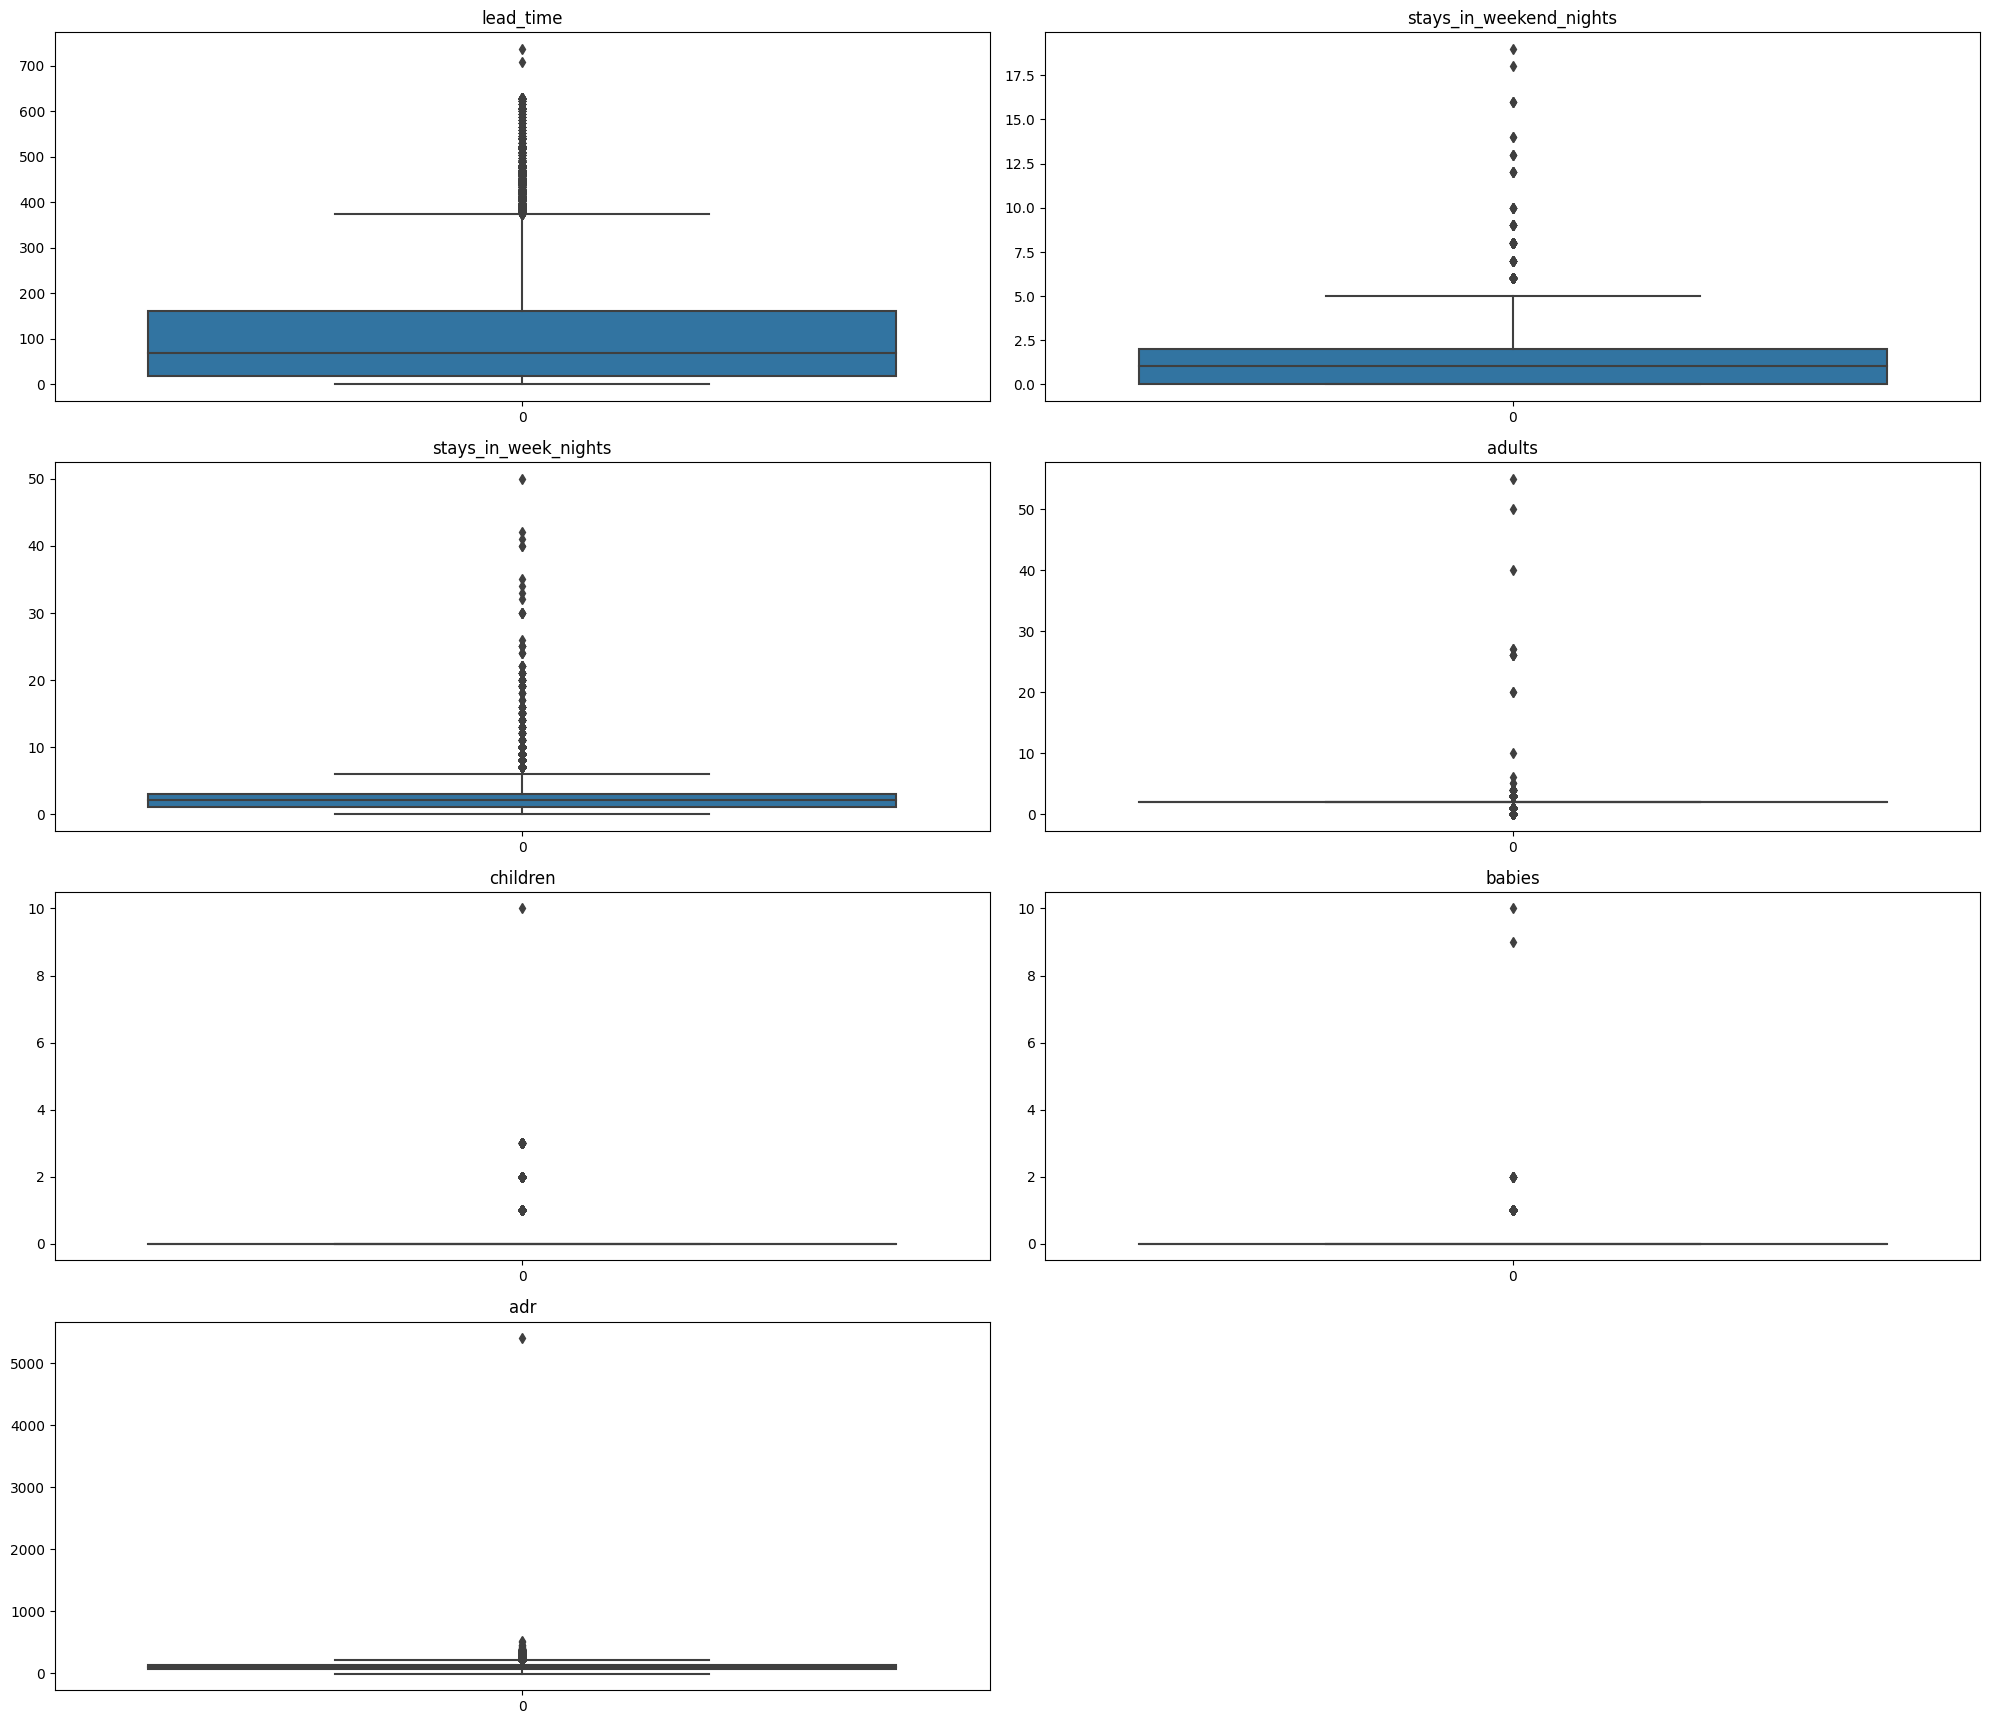

In [ ]:
# List of columns to check for outliers
kolom_yang_diperiksa = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr']
plt.figure(figsize=(20,30))

# Melakukan perulangan untuk setiap kolom yang akan diperiksa
for i, kolom in enumerate(kolom_yang_diperiksa):
    plt.subplot(7, 2, i+1)
    sns.boxplot(df[kolom])
    plt.title(kolom)

# Mengatur tata letak subplot agar lebih rapi
plt.tight_layout()
plt.show()

Kumpulan data contains Outliers

In [ ]:
#Memeriksa outlier dalam variabel kontinu
df[con_var].describe()

<ipython-input-17-dd9692ec53a3>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[con_var].describe()


,lead_time,previous_cancellations,agent,arrival_date_day_of_month,booking_changes,stays_in_weekend_nights,stays_in_week_nights,previous_bookings_not_canceled,arrival_date_week_number,company,days_in_waiting_list,adults,adr
count,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,6797.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.087118,86.693382,15.798241,0.221124,0.927599,2.500302,0.137097,27.165173,189.266735,2.321149,1.856403,101.831122
std,106.863097,0.844336,110.774548,8.780829,0.652306,0.998613,1.908286,1.497437,13.605138,131.655015,17.594721,0.579261,50.535790
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,-6.380000
25%,18.000000,0.000000,9.000000,8.000000,0.000000,0.000000,1.000000,0.000000,16.000000,62.000000,0.000000,2.000000,69.290000
50%,69.000000,0.000000,14.000000,16.000000,0.000000,1.000000,2.000000,0.000000,28.000000,179.000000,0.000000,2.000000,94.575000
75%,160.000000,0.000000,229.000000,23.000000,0.000000,2.000000,3.000000,0.000000,38.000000,270.000000,0.000000,2.000000,126.000000
max,737.000000,26.000000,535.000000,31.000000,21.000000,19.000000,50.000000,72.000000,53.000000,543.000000,391.000000,55.000000,5400.000000


### Daftar Variabel Kontinu dengan Outlier yang diidentifikasi melalui Ringkasan Statistik adalah
LeadTime
WaitingDays
WeekendStay
Adults
PrevBook
PrevCancel
WeekStay
### List of Continuous Variables which should be Categorical (Daftar Variabel Kontinu yang Harus Dikategorikan)
PrevBook
PrevCancel

## Menghitung Outlier (untuk Variabel Kontinu)

In [ ]:
# hotel.loc[hotel.LeadTime      > 500,'LeadTime'     ]=500
# hotel.loc[hotel.WaitingDays   >   0,'WaitingDays'  ]=  1
# hotel.loc[hotel.WeekendStay   >=  5,'WeekendStay'  ]=  5
# hotel.loc[hotel.Adults        >   4,'Adults'       ]=  4
# hotel.loc[hotel.PrevBook      >   0,'PrevBook'     ]=  1
# hotel.loc[hotel.PrevCancel    >   0,'PrevCancel'   ]=  1
# hotel.loc[hotel.WeekStay      >  10,'WeekStay'     ]= 10
# hotel.loc[hotel.ChangeBooking >   5,'ChangeBooking']=  5

# cat_var = set(list(cat_var) + ['PrevBook','PrevCancel'])
# con_var = set(hotel.columns) - cat_var

# hotel[con_var].describe()

In [ ]:
# #outliers in categorical variables
# df[cat_var].describe()

In [ ]:
# df.loc[df.Babies    > 8,'Babies']    = 0
# df.loc[df.ParkSpace > 5,'ParkSpace'] = 0
# df.loc[df.Children  > 8,'Children']  = 0

# df[cat_var].describe()

#3. Data Preparation

mengkategorikan tipe tamu berdasarkan jumlah orang dewasa, anak-anak, dan bayi yang ada dalam satu kelompok. Kategori tipe tamu yang ditentukan adalah 'Single' (untuk tamu sendiri), 'Couple' (untuk pasangan), 'Group' (untuk kelompok dengan lebih dari 2 orang dewasa), dan 'Family' (untuk keluarga dengan anak-anak dan/atau bayi)

In [ ]:
# Function to categorize group type
def guest_type(row):
    if row['adults'] == 1 and row['children'] == 0 and row['babies'] == 0:
        return 'Single'
    elif row['adults'] == 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Couple'
    elif row['adults'] > 2 and row['children'] == 0 and row['babies'] == 0:
        return 'Group'
    else:
        return 'Family'

# Apply the function to the dataframe
df['guestType'] = df.apply(guest_type, axis=1)

# Display the first few rows of the dataframe to confirm
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guestType
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Single
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Single
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Couple


Menambahkan dua kolom baru pada dataset 'HOTEL', yaitu 'season' dan 'day_of_week', dan menghapus kolom 'date' yang tidak diperlukan lagi
. Dalam hal ini, kolom 'season' dan 'day_of_week' dapat membantu kita memahami pola kunjungan tamu ke hotel dan memprediksi tingkat hunian hotel di masa depan.

In [ ]:
#Mengimpor library yang diperlukan
import calendar
from datetime import datetime

# Map from month to season (for Northern hemisphere)
# Membuat dictionary 'seasons' yang berisi daftar bulan untuk setiap musim di belahan bumi utara:

seasons = {
    'Winter': ['December', 'January', 'February'],
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Autumn': ['September', 'October', 'November']
}

# Function to map a month to a season
#Membuat fungsi 'month_to_season' yang akan digunakan untuk memetakan setiap bulan ke musim yang sesuai:
def month_to_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

# Create 'season' column
# Menambahkan kolom 'season' pada dataset 'df' dengan menggunakan fungsi 'month_to_season':
df['season'] = df['arrival_date_month'].apply(month_to_season)

# Create 'day_of_week' column
# Membuat kolom 'date' yang berisi tanggal kedatangan tamu dalam format datetime:
df['date'] = df.apply(lambda row: datetime.strptime(f"{int(row['arrival_date_year'])} {row['arrival_date_month']} {int(row['arrival_date_day_of_month'])}", "%Y %B %d"), axis=1)
df['day_of_week'] = df['date'].dt.day_name()

# Drop the 'date' column as we no longer need it
#Menghapus kolom 'date' yang tidak diperlukan lagi:
df = df.drop(columns=['date'])

In [ ]:
# Display the first few rows of the dataframe to confirm
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guestType,season,day_of_week
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Couple,Summer,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Couple,Summer,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Single,Summer,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Single,Summer,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Couple,Summer,Wednesday


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           217 non-null    object 
 1   is_canceled                     217 non-null    int64  
 2   lead_time                       217 non-null    int64  
 3   arrival_date_year               217 non-null    int64  
 4   arrival_date_month              217 non-null    object 
 5   arrival_date_week_number        217 non-null    int64  
 6   arrival_date_day_of_month       217 non-null    int64  
 7   stays_in_weekend_nights         217 non-null    int64  
 8   stays_in_week_nights            217 non-null    int64  
 9   adults                          217 non-null    int64  
 10  children                        217 non-null    float64
 11  babies                          217 non-null    int64  
 12  meal                          

In [ ]:
#convert to csv
hotel.to_csv('Grub25_hasilCleaning_HotelCancellation.csv', index=False)
hotel = pd.read_csv('Grub25_hasilCleaning_HotelCancellation.csv')

#4.analysis and visualizations

Numerical Variables Overview

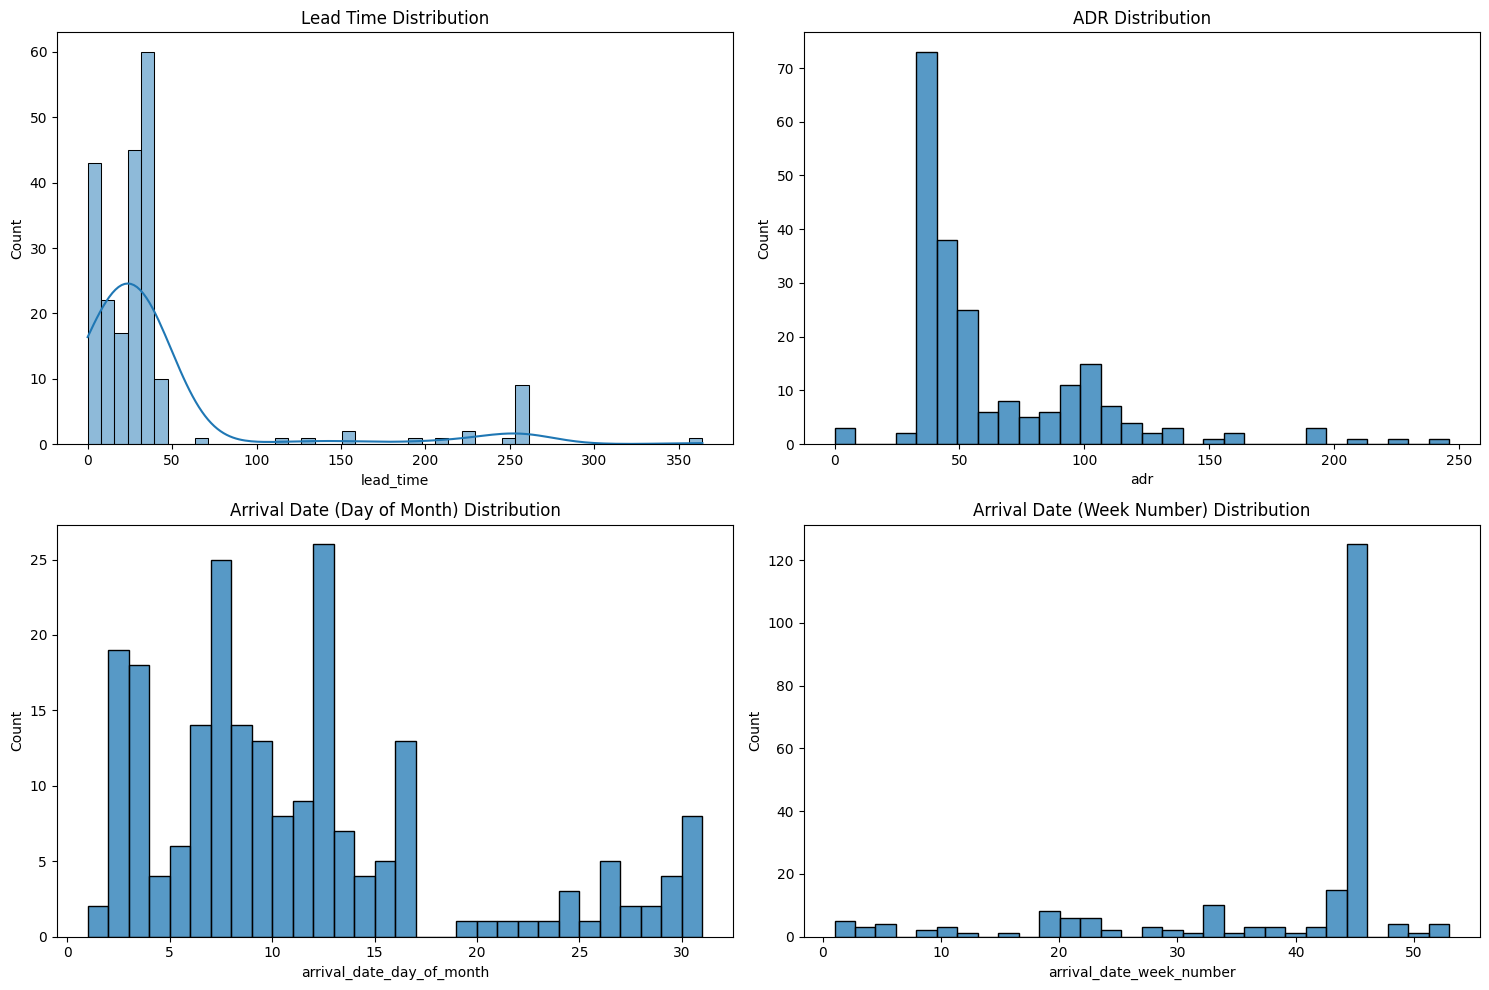

In [ ]:
# Plot the distribution of some key numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Lead time
sns.histplot(hotel['lead_time'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Lead Time Distribution')

# Average Daily Rate
sns.histplot(hotel['adr'], kde=False, bins=30, ax=axes[0, 1])
axes[0, 1].set_title('ADR Distribution')

# Arrival Date (Day of Month)
sns.histplot(hotel['arrival_date_day_of_month'], kde=False, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Arrival Date (Day of Month) Distribution')

# Arrival Date (Week Number)
sns.histplot(hotel['arrival_date_week_number'], kde=False, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Arrival Date (Week Number) Distribution')

plt.tight_layout()
plt.show()

1. Distribusi Lead Time: Sebagian besar pemesanan memiliki lead time kurang dari 200 hari. Namun, ada pemesanan dengan lead time hingga 700 hari.

2. Distribusi ADR (Average Daily Rate): Distribusi ADR memiliki sedikit kemiringan ke kanan, dengan sebagian besar tarif kurang dari 200. Namun, ada beberapa pemesanan dengan tarif yang lebih tinggi.

3. Distribusi Tanggal Kedatangan (Hari dalam Bulan): Tanggal kedatangan dalam bulan memiliki distribusi yang cukup merata, dengan sedikit penurunan pada akhir bulan. Ini menunjukkan bahwa kami menerima jumlah tamu yang lebih tinggi menjelang akhir setiap bulan.

4. Distribusi Tanggal Kedatangan (Nomor Minggu): Nomor minggu kedatangan menunjukkan distribusi bimodal, dengan puncak sekitar minggu 30 (pertengahan Juli) dan minggu 40 (awal Oktober). Ini menunjukkan bahwa ada lebih banyak pemesanan selama musim panas.

1.Dari mana datangnya tamu-tamu itu?

In [ ]:
country_count = pd.DataFrame(hotel.loc[hotel["is_canceled"] == 0]["country"].value_counts())

country_count.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_count["Number of Guests"].sum()
country_count["Guests in %"] = round(country_count["Number of Guests"] / total_guests * 100, 2)
country_count["country"] = country_count.index

fig = px.pie(country_count,
             values="Number of Guests",
             names="country",
             title="Guest Country Demographic",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_count, locations = country_count['country'],
                           color = country_count['Number of Guests'], hover_name = country_count['country'])
guests_map.show()

 Dari negara manakah tamu paling banyak datang? From which country the most guests are coming?

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

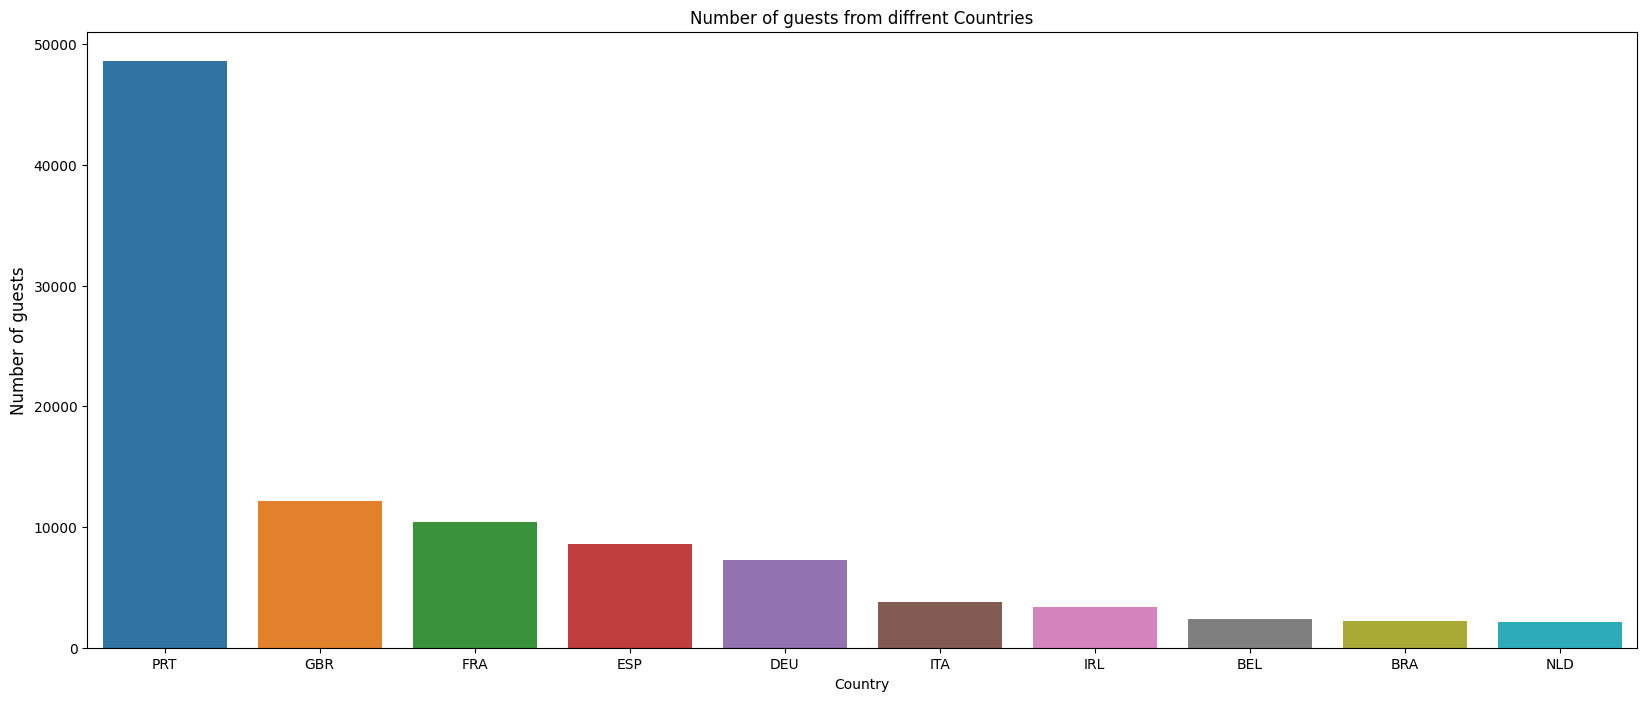

In [ ]:
# Counting the guests from various countries.
country_df=df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df1=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

Apa tipe tamu hotelnya?

In [ ]:
guest_type_count = df["guestType"].value_counts()

fig = px.pie(guest_type_count,
             values=guest_type_count.values,
             names=guest_type_count.index,
             title="Guest Type Proportion",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

1)Jenis hotel manakah yang paling disukai para tamu?

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

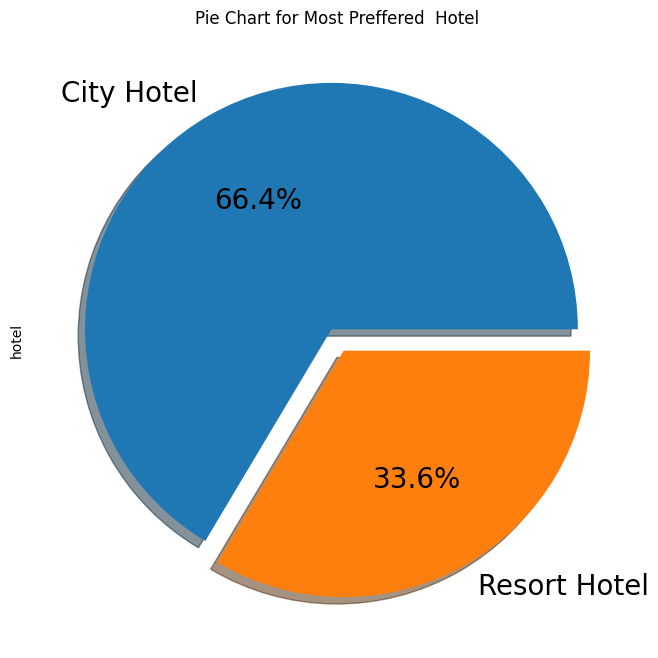

In [ ]:
# Visualizsing the by pie chart.
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Pie Chart for Most Preffered  Hotel')

**PEMBATALAN**

Berapa persentase pembatalannya?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

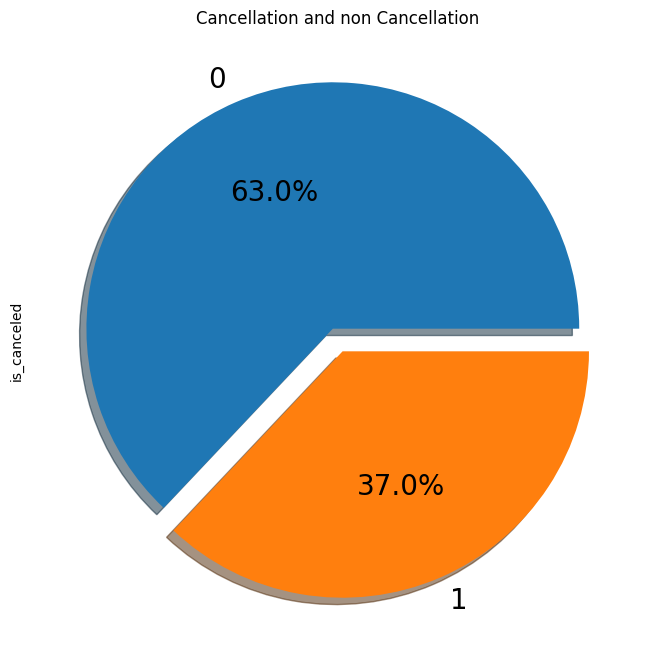

In [ ]:

df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

Observation :
0= not cancled
1= canceled
27.5 % of the bookings were cancelled.

Pembatalan hotel berdasarkan Jenis Hote

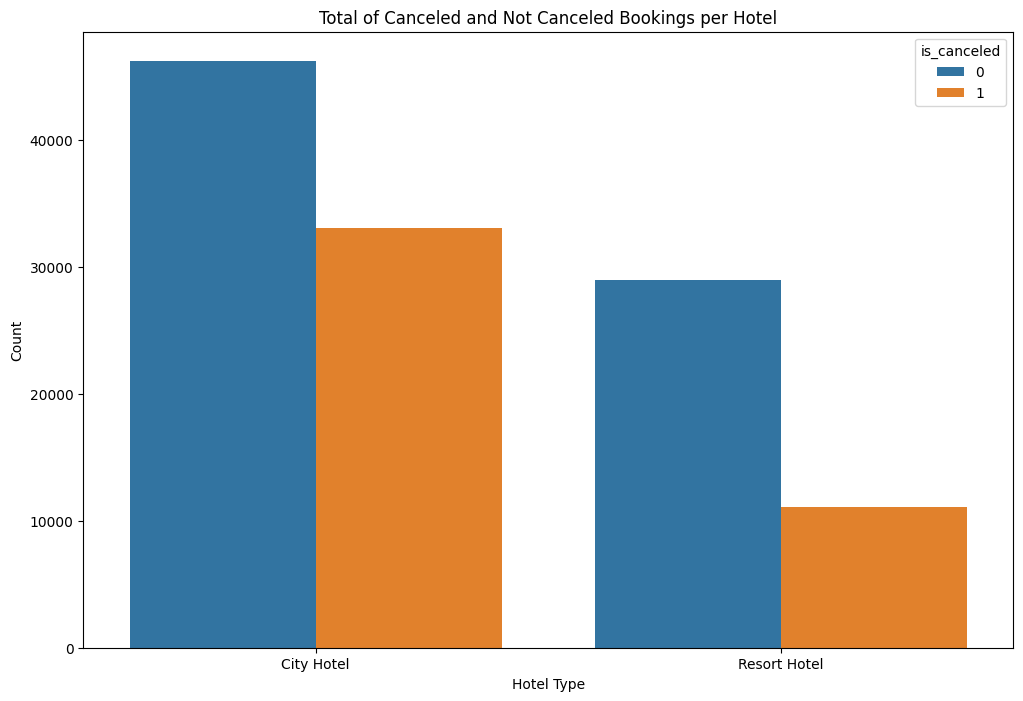

In [ ]:
# Group the data by "market_segment" and "is_canceled"
grouped_data = df.groupby(["hotel", "is_canceled"]).size().reset_index(name="count")

# Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x="hotel", y="count", hue="is_canceled")
plt.title("Total of Canceled and Not Canceled Bookings per Hotel")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.show()

Sebagian besar pemesanan dilakukan di CITY hotel
.Pembatalan di hotel resor lebih sedikit dibandingkan dengan City hotel

### 4 Kedatangan dalam bulan dan tahu (Arrivals in month and year)

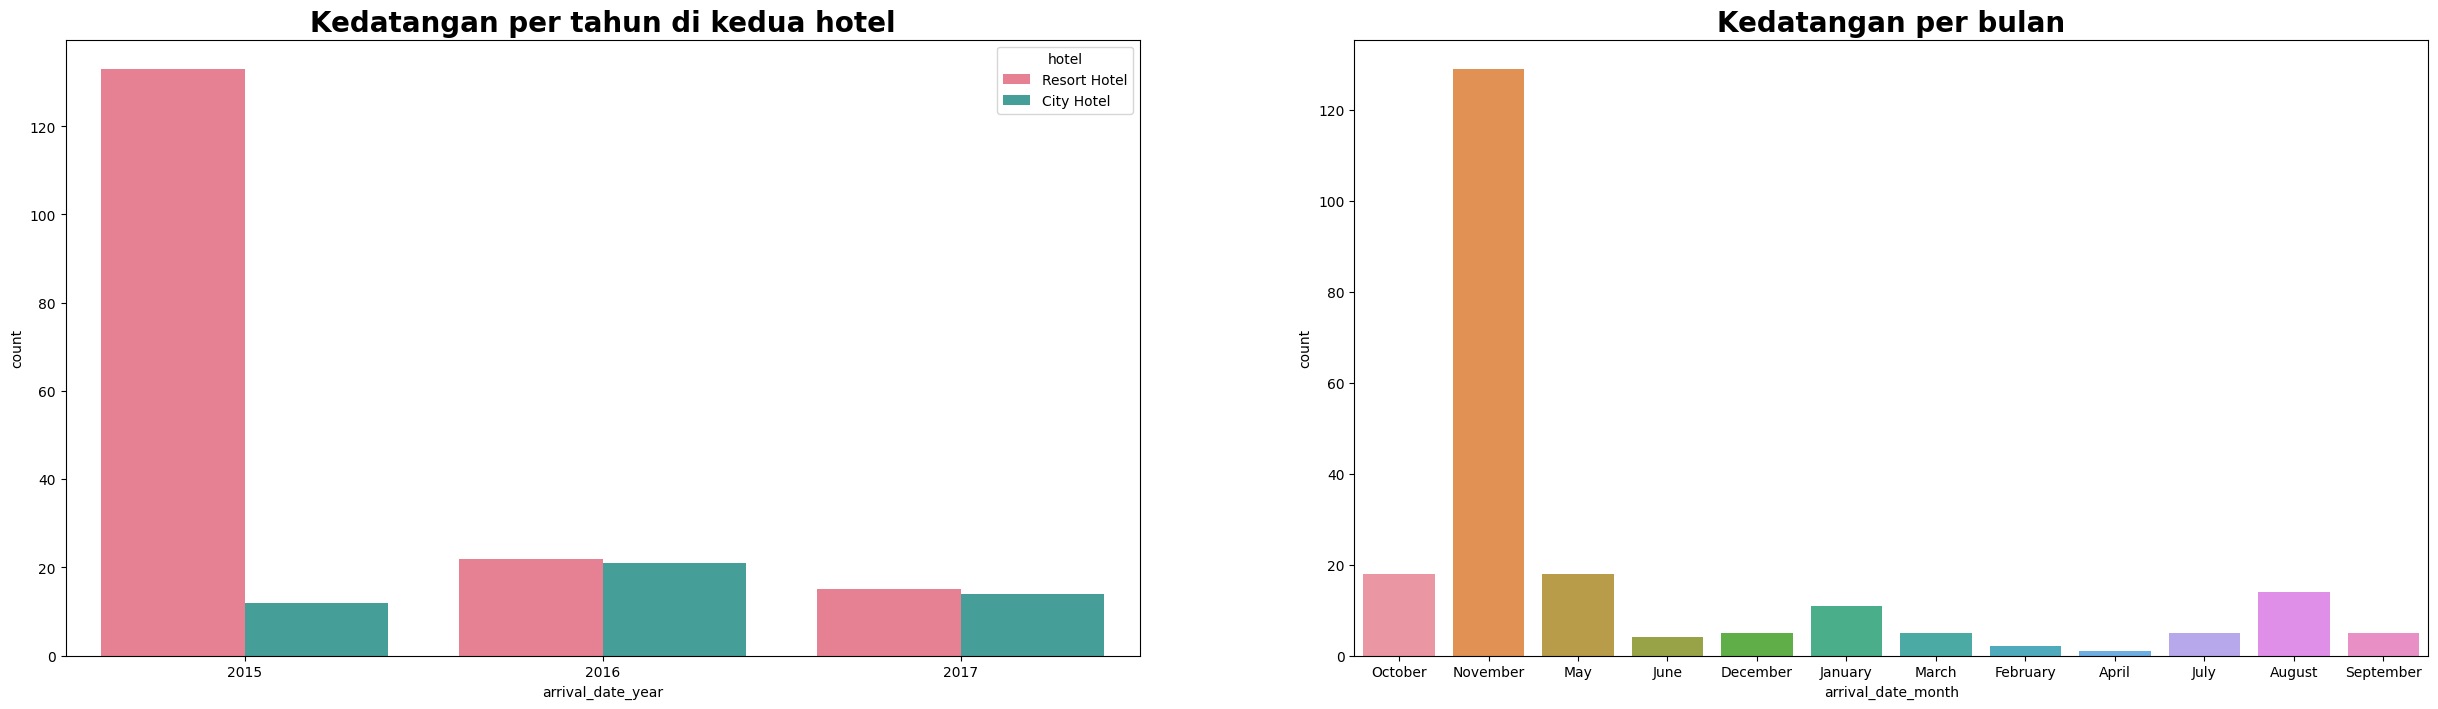

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year', hue='hotel', data=hotel, palette='husl')
plt.title("Kedatangan per tahun di kedua hotel", fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data=hotel, x='arrival_date_month')
plt.title('Kedatangan per bulan', fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()


### Kita dapat melihat sebagian besar pemesanan dilakukan pada tahun 2016 dan pemesanan dilakukan di City hotel
### Kebanyakan pemesanan dilakukan pada bulan Mei, Juni, Juli, Agustus

### 4 Tanggal Kedatangan(Arrivarl Date)

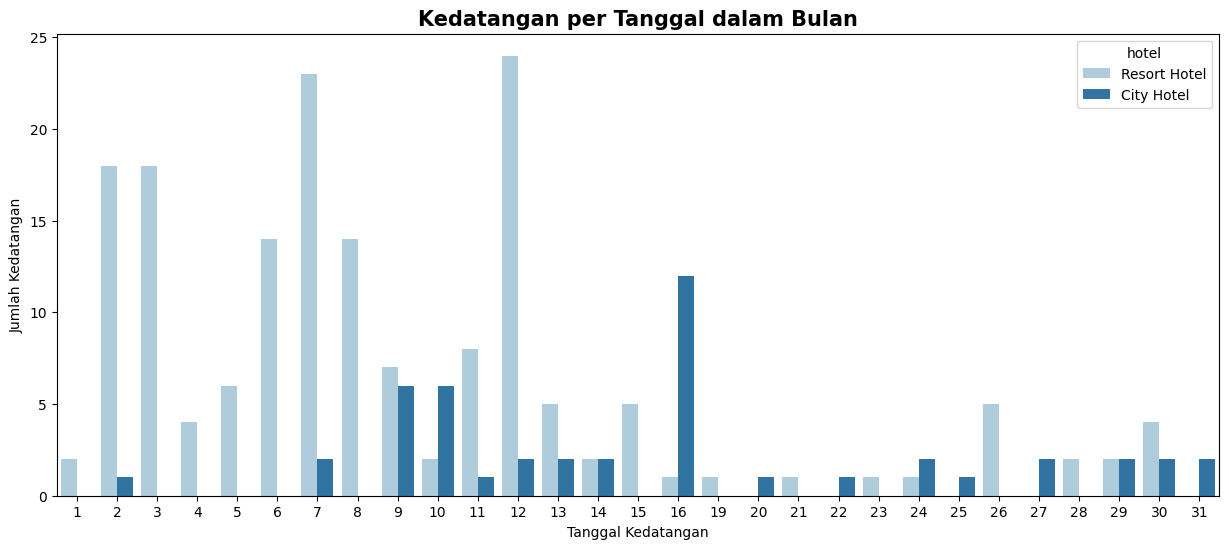

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

sns.countplot(data=hotel, x='arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.title('Kedatangan per Tanggal dalam Bulan', fontweight='bold', size=15)
plt.xlabel('Tanggal Kedatangan')
plt.ylabel('Jumlah Kedatangan')
plt.show()


### Hari akhir bulan kedatangannya sangat sedikit .Pemesanan lebih banyak di hotel City

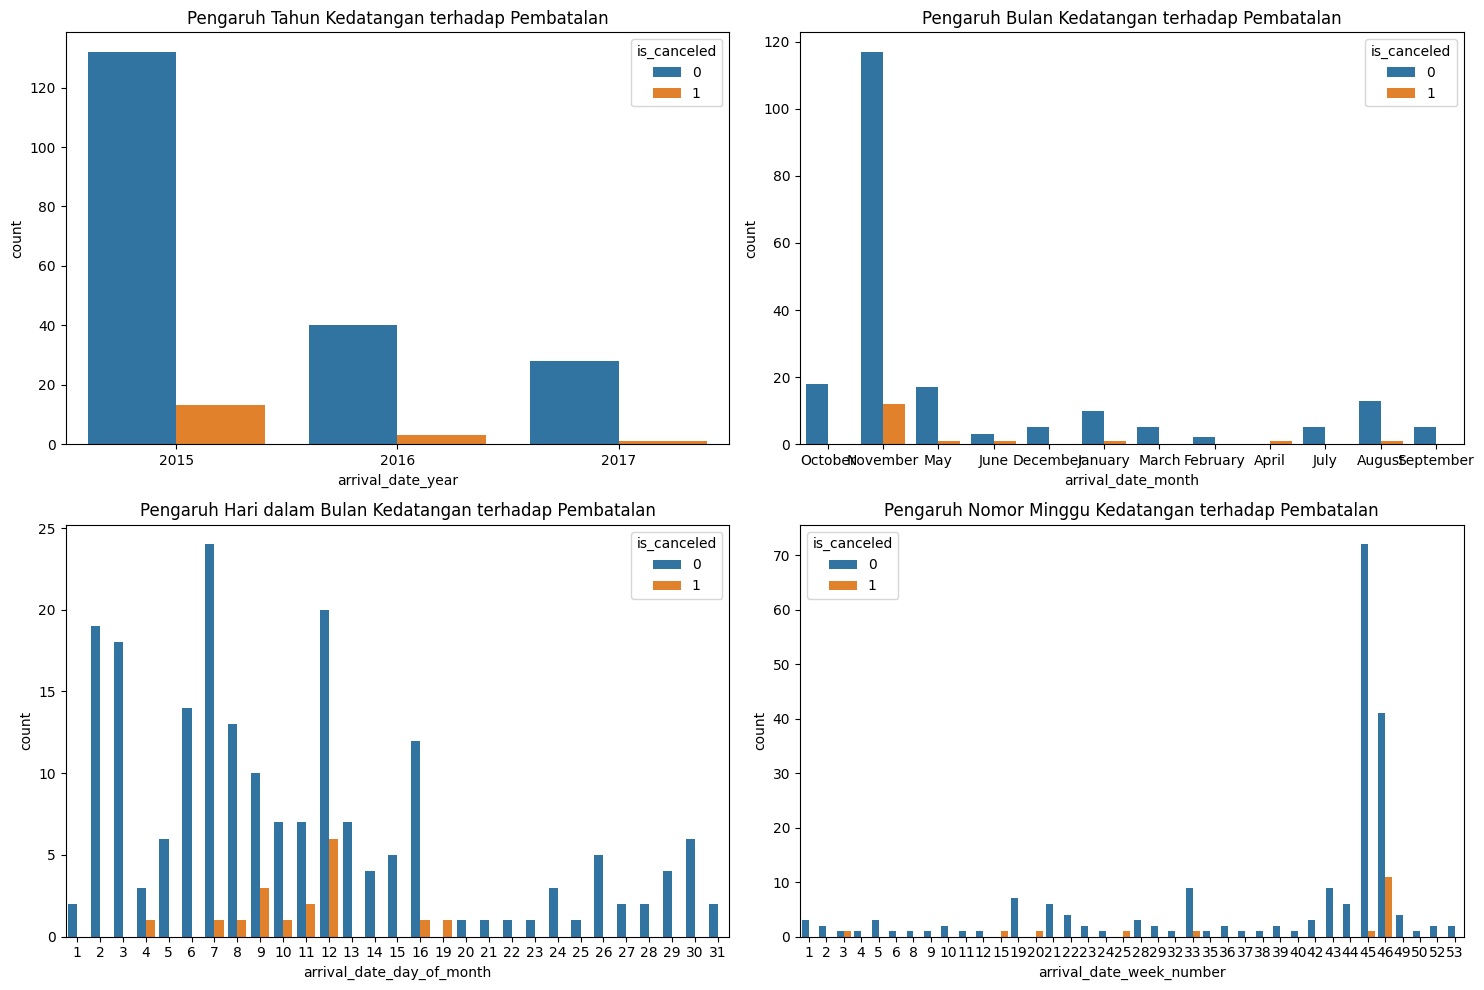

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Arrival Date (Year) vs Cancellation
sns.countplot(data=hotel, x='arrival_date_year', hue='is_canceled', ax=axes[0, 0])
axes[0, 0].set_title('Pengaruh Tahun Kedatangan terhadap Pembatalan')

# Arrival Date (Month) vs Cancellation
sns.countplot(data=hotel, x='arrival_date_month', hue='is_canceled', ax=axes[0, 1])
axes[0, 1].set_title('Pengaruh Bulan Kedatangan terhadap Pembatalan')

# Arrival Date (Day of Month) vs Cancellation
sns.countplot(data=hotel, x='arrival_date_day_of_month', hue='is_canceled', ax=axes[1, 0])
axes[1, 0].set_title('Pengaruh Hari dalam Bulan Kedatangan terhadap Pembatalan')

# Arrival Date (Week Number) vs Cancellation
sns.countplot(data=hotel, x='arrival_date_week_number', hue='is_canceled', ax=axes[1, 1])
axes[1, 1].set_title('Pengaruh Nomor Minggu Kedatangan terhadap Pembatalan')

plt.tight_layout()
plt.show()


Pembatalan hotel berdasarkan Segmen Pasar


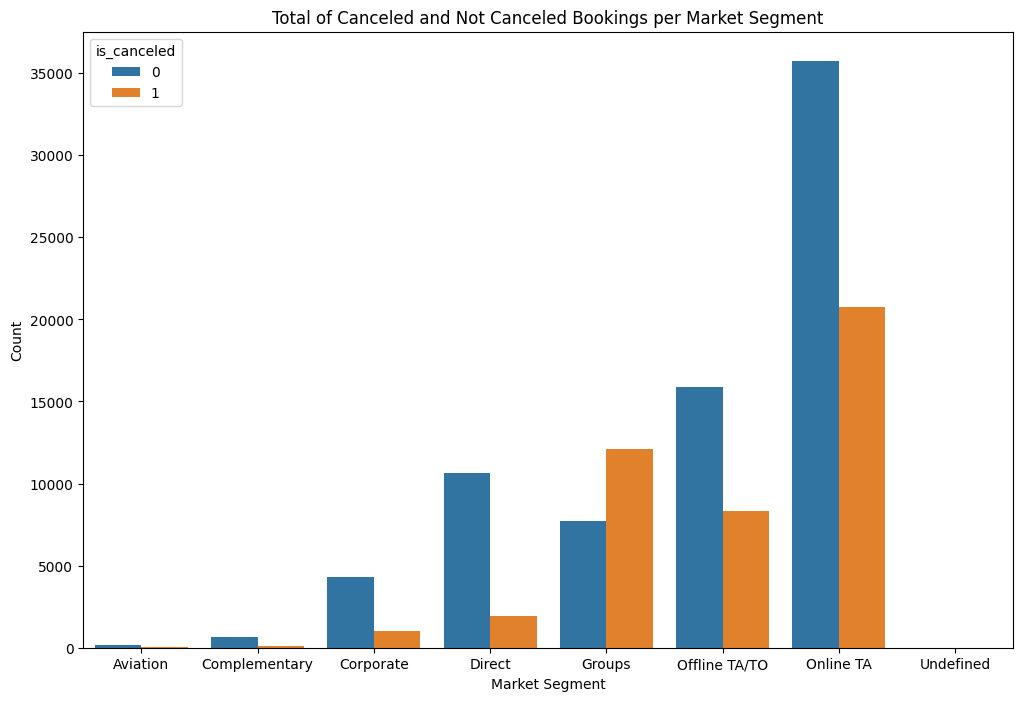

In [ ]:
# Group the data by "market_segment" and "is_canceled"
grouped_data = df.groupby(["market_segment", "is_canceled"]).size().reset_index(name="count")

# Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x="market_segment", y="count", hue="is_canceled")
plt.title("Total of Canceled and Not Canceled Bookings per Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.show()

- 60% dari tamu hotel berasal dari Wilayah Uni Eropa, dengan Portugal sebagai yang tertinggi.
- 68% dari tamu hotel adalah pasangan.
- 47,3% dari tamu hotel melakukan pemesanan mereka melalui Agen Perjalanan Online.
- Untuk Hotel Kota, musim ramai adalah pada bulan April - Mei dan September - Oktober. Sementara itu, untuk Resort Hotel, musim ramai adalah pada bulan Juni - Agustus.
- Tingkat pembatalan pemesanan Hotel Kota lebih tinggi daripada Resort Hotel.
- Untuk Segmen Grup, tingkat pembatalan lebih tinggi daripada tingkat pemesanan.

**Apakah ada hubungan antara waktu tunggu pemesanan dengan pembatalan pemesanan hotel?**

In [ ]:
# Buatlah kolom baru untuk kategori lead time pemesanan
df['lead_time_category'] = pd.cut(
    df['lead_time'],
    [0, 7, 15, 30, 90, 180, 365, 750],
    labels=['early book','two weeks book','a month book', 'quarter year book', 'half year book','a year book','> one year book']
)

relation_1= pd.pivot_table(
    data=df,
    index = 'lead_time_category',
    columns='is_canceled',
    values='hotel',
    aggfunc='count'
)

# Calculating

stat, p, dof, expected = chi2_contingency(relation_1)

# Checking the Hypothesis Results

alpha = 0.05

if p<= alpha:
  print("Reject H0: Booking lead time has relation with cancelation of hotel booking")
else:
  print("H0 is Accepted: Booking lead time has no relation with cancelation of hotel booking")

Reject H0: Booking lead time has relation with cancelation of hotel booking


**H0 : Booking Lead Time ada hubungannya dengan Pembatalan Pemesanan Hotel**

Bagaimana kita bisa melihatnya di diagram batang?

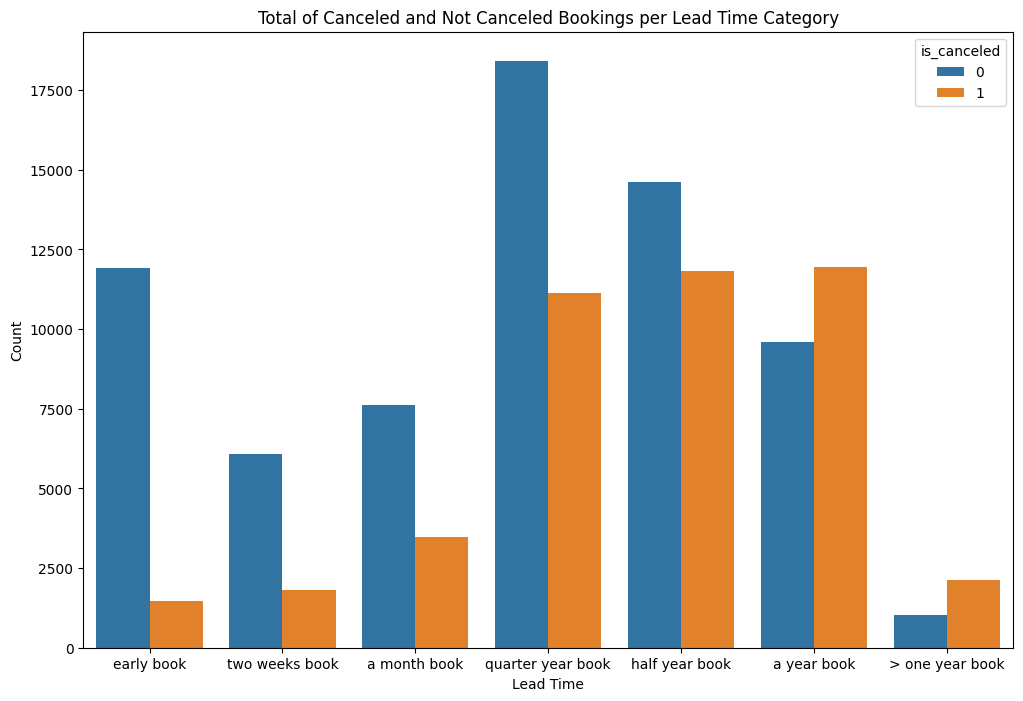

In [ ]:
# Group the data by "market_segment" and "is_canceled"
grouped_data = df.groupby(["lead_time_category", "is_canceled"]).size().reset_index(name="count")

# Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x="lead_time_category", y="count", hue="is_canceled")
plt.title("Total of Canceled and Not Canceled Bookings per Lead Time Category")
plt.xlabel("Lead Time")
plt.ylabel("Count")
plt.show()

PLOTE

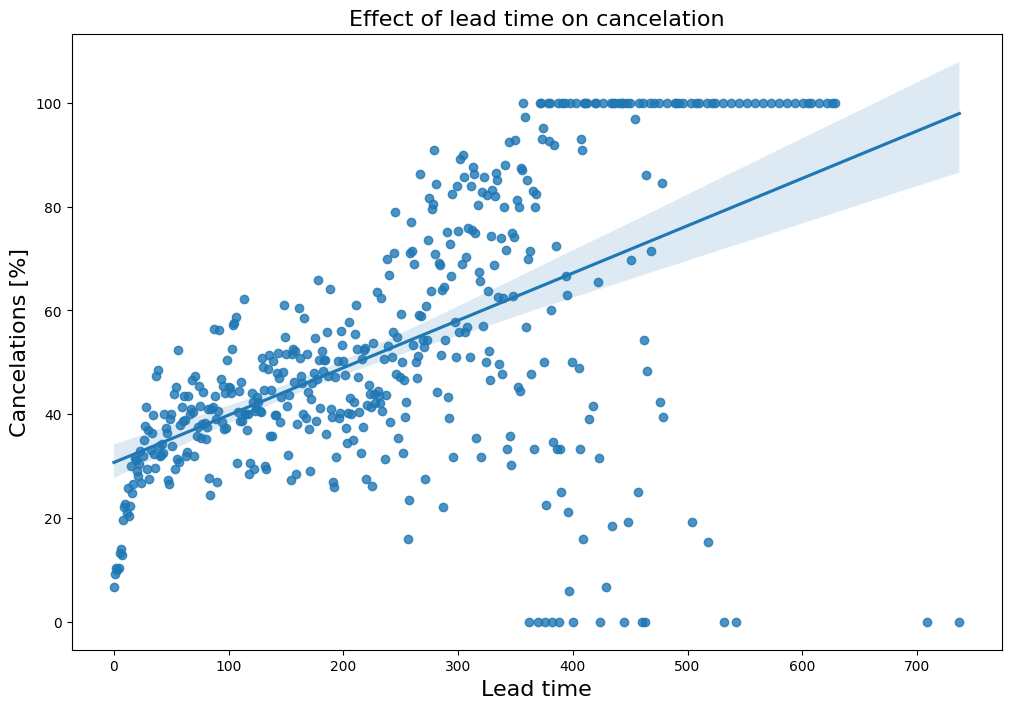

In [ ]:
# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data.index, y=lead_cancel_data["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

5) Berapa persentase distribusi "Jenis Pelanggan"?

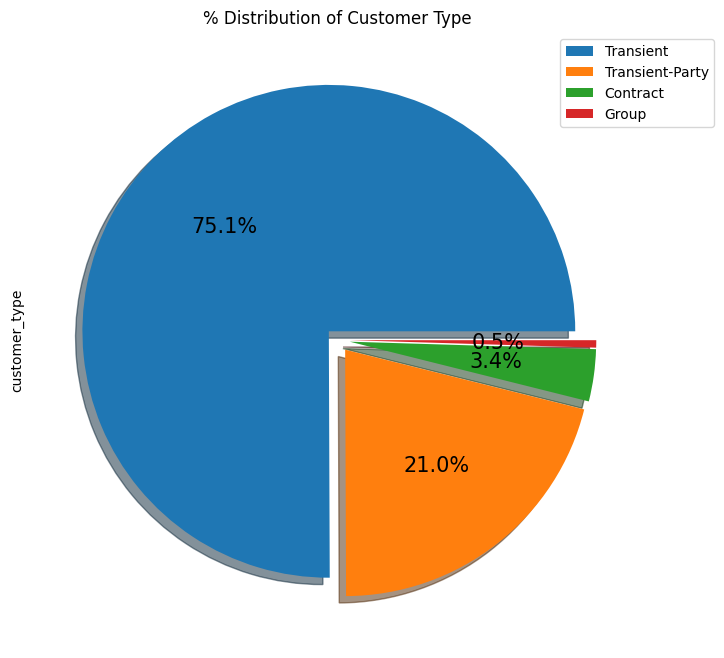

In [ ]:
df['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)
labels=df['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Jenis pelanggan sementara lebih banyak yaitu 82,4 %. persentase Pemesanan yang dikaitkan oleh Grup sangat rendah.

1. contract (Kontrak)

   Ketika pemesanan memiliki peruntukan atau jenis kontrak lain yang terkait dengannya.

2. Grup

   Ketika pemesanan terkait dengan sebuah kelompok.

3. Transient

   Ketika pemesanan tidak termasuk dalam kelompok atau kontrak, dan tidak terkait dengan pemesanan transien lainnya.

4. Transient-party
   Ketika pemesanan bersifat transien, tetapi terkait dengan setidaknya satu pemesanan transien lainnya.

Berapa rata-rata harga kamar per malam untuk kedua tipe hotel tersebut?

In [ ]:
# Normalisasi Harga per malam (adr)
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
full_data_guests = df.loc[df["is_canceled"] == 0] # only actual guests
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

Text(0.5, 1.0, 'Price per night for each hotel type over the months of arrival')

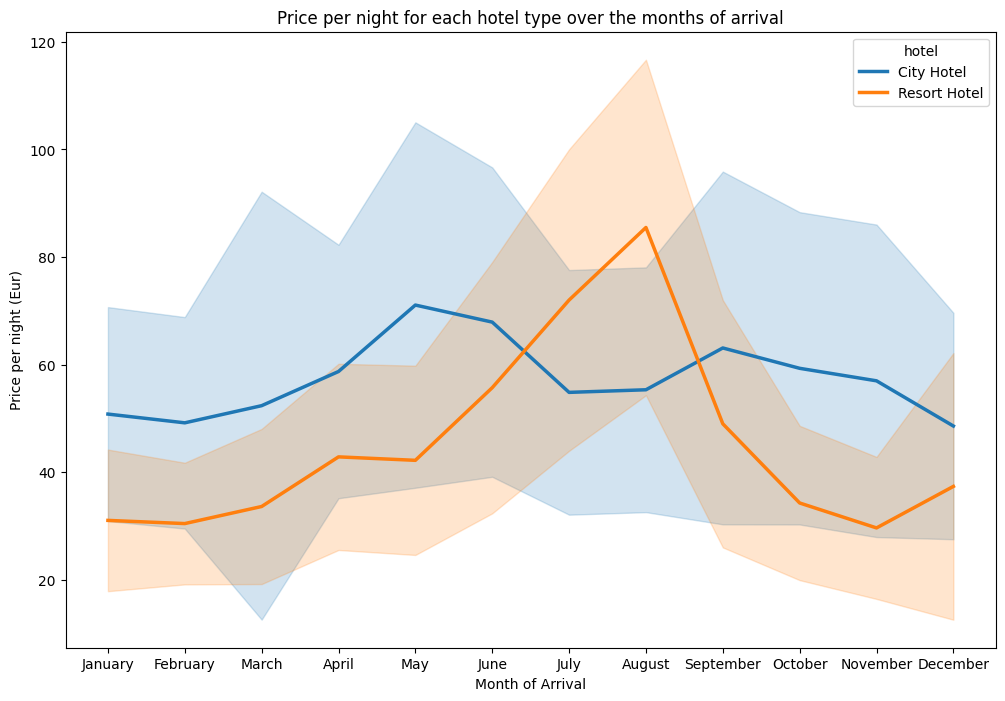

In [ ]:
# Filter data hanya untuk kolom yang diperlukan
df_filtered = df[['arrival_date_month', 'hotel', 'adr_pp']]

room_prices_monthly = df[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

# Group the data by 'hotel' and 'arrival_date_month', calculate the mean 'adr' for each group
df_grouped = df_filtered.groupby(['hotel', 'arrival_date_month']).mean().reset_index()

# Create
plt.figure(figsize=(12, 8))

# Create the line plot
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly,
          hue_order = ["City Hotel", "Resort Hotel"], errorbar="sd", size="hotel", sizes=(2.5, 2.5))

# Add labels and title to the plot
plt.xlabel('Month of Arrival')
plt.ylabel('Price per night (Eur)')
plt.title('Price per night for each hotel type over the months of arrival')

# Show the plot
#Harga per malam untuk setiap tipe hotel selama bulan kedatangan